In [4]:
# import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../newsData/raw_analyst_ratings.csv")  
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,1407328,1407328
unique,NaN,845770,883429,1034,39957,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,NaN,5449,1704,228373,1766,3333
mean,7.072454e+05,NaN,NaN,NaN,NaN,NaN
std,4.081009e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,3.538128e+05,NaN,NaN,NaN,NaN,NaN
50%,7.072395e+05,NaN,NaN,NaN,NaN,NaN
75%,1.060710e+06,NaN,NaN,NaN,NaN,NaN


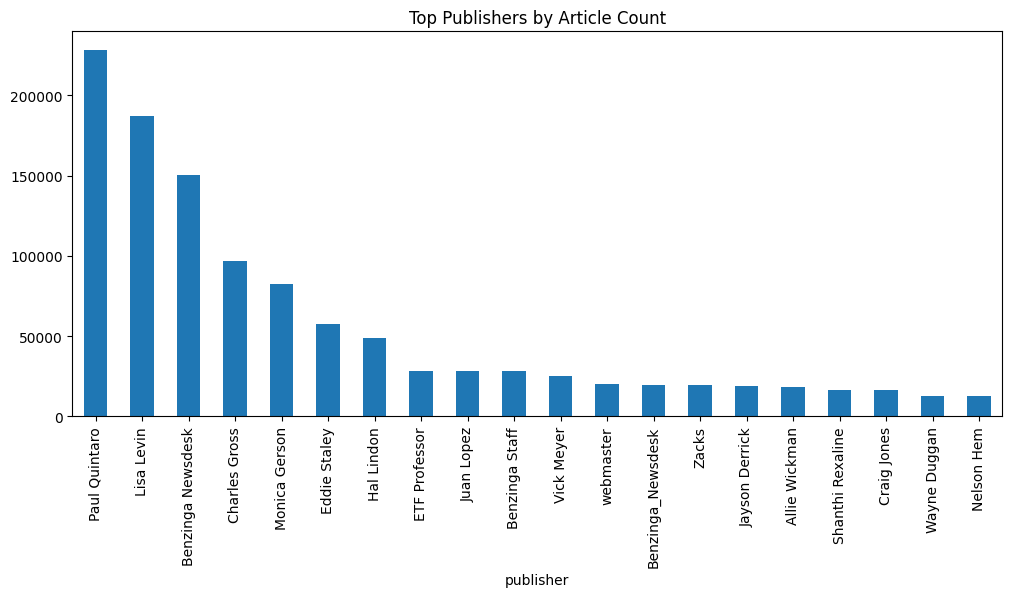

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_23648\4145676151.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date"] = pd.to_datetime(df["date"], errors='coerce', infer_datetime_format=True)


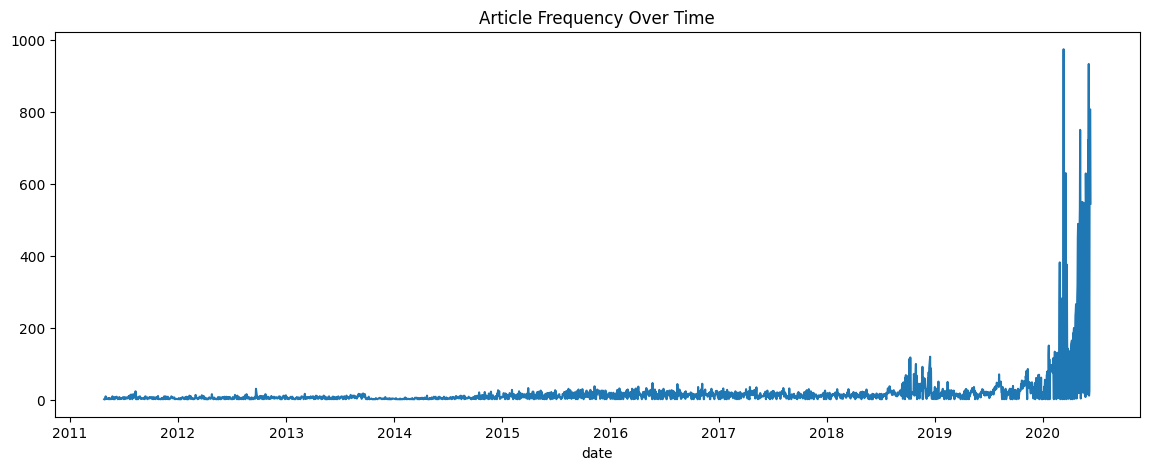

In [36]:
#1. Descrptive statstics
df["headline_length"] = df["headline"].astype(str).apply(len)
df["headline_length"].describe()

publisher_counts = df["publisher"].value_counts()
publisher_counts.head(20).plot(kind="bar", figsize=(12,5))
plt.title("Top Publishers by Article Count")
plt.show()

df["date"] = pd.to_datetime(df["date"], errors='coerce', infer_datetime_format=True)
articles_per_day = df.groupby(df["date"].dt.date).size()
articles_per_day.plot(figsize=(14,5))
plt.title("Article Frequency Over Time")
plt.show()


=== Daily Publication Counts (sample) ===


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_23648\2883457139.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_ts.resample('M').size()


date
2011-04-28 00:00:00+00:00    3
2011-04-29 00:00:00+00:00    2
2011-04-30 00:00:00+00:00    1
2011-05-01 00:00:00+00:00    1
2011-05-02 00:00:00+00:00    4
Freq: D, dtype: int64


=== Weekly Publication Counts (sample) ===


date
2011-05-01 00:00:00+00:00     7
2011-05-08 00:00:00+00:00    15
2011-05-15 00:00:00+00:00    11
2011-05-22 00:00:00+00:00    14
2011-05-29 00:00:00+00:00    18
Freq: W-SUN, dtype: int64


=== Monthly Publication Counts (sample) ===


date
2011-04-30 00:00:00+00:00      6
2011-05-31 00:00:00+00:00     66
2011-06-30 00:00:00+00:00     79
2011-07-31 00:00:00+00:00    110
2011-08-31 00:00:00+00:00    103
Freq: ME, dtype: int64


=== Detected Spike Days (High Activity) ===


date
2020-02-25 00:00:00+00:00     74
2020-02-27 00:00:00+00:00     95
2020-03-09 00:00:00+00:00     74
2020-03-12 00:00:00+00:00     88
2020-03-16 00:00:00+00:00     97
                            ... 
2020-06-05 00:00:00+00:00    232
2020-06-08 00:00:00+00:00    298
2020-06-09 00:00:00+00:00    316
2020-06-10 00:00:00+00:00    323
2020-06-11 00:00:00+00:00    160
Length: 64, dtype: int64


=== Hourly Distribution of Publications ===


hour
0      113
1       73
2       42
3       22
4       46
5       14
6       41
7       73
8      603
9      922
10    2129
11    3830
12    4818
13    4260
14    3187
15    2225
16    2197
17    1842
18    1447
19    1158
20    3548
21    2635
22     640
23     196
Name: count, dtype: int64


=== Publications by Day of Week ===


day_of_week
Monday       6965
Tuesday      7482
Wednesday    7659
Thursday     7831
Friday       5754
Saturday      162
Sunday        208
dtype: int64

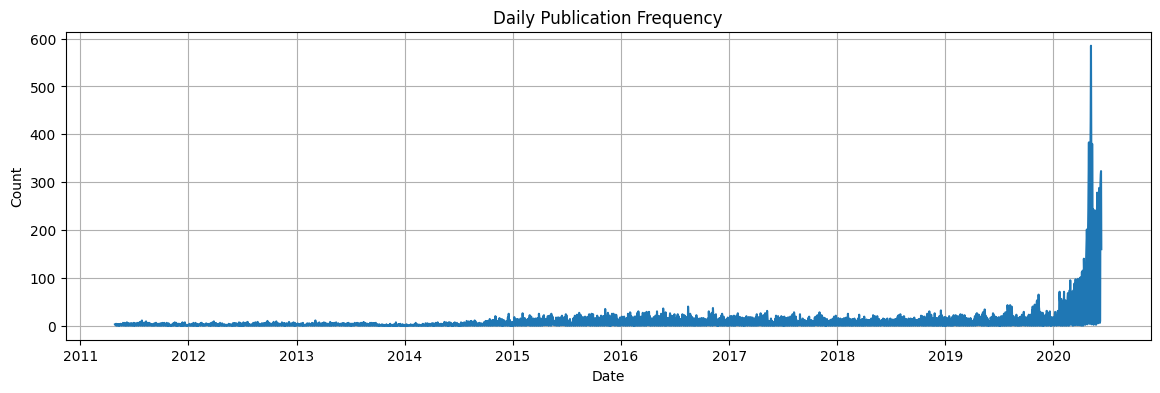

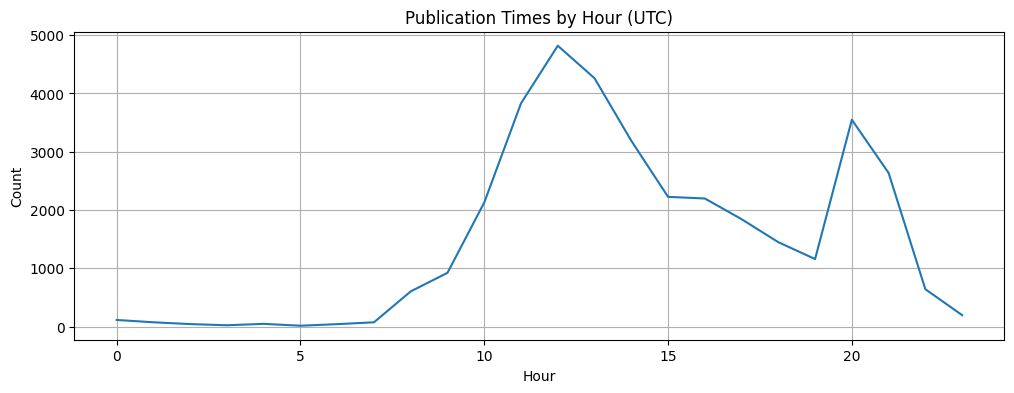

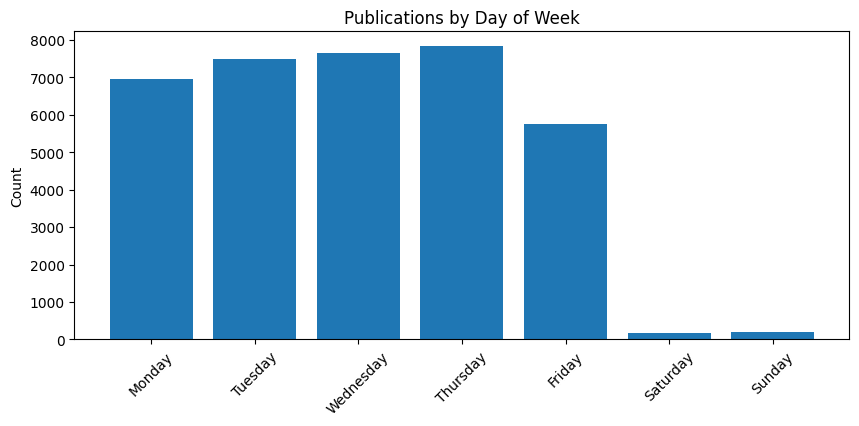

In [37]:
#2. TIME SERIES ANALYSIS (COMBINED) ---
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df = df.dropna(subset=['date']).drop_duplicates(subset=['headline', 'date'])
df = df.sort_values('date').reset_index(drop=True)

df_ts = df.set_index('date')
daily_counts   = df_ts.resample('D').size()
weekly_counts  = df_ts.resample('W').size()
monthly_counts = df_ts.resample('M').size()

threshold = daily_counts.mean() + 2 * daily_counts.std()
spike_days = daily_counts[daily_counts > threshold]

df['hour'] = df['date'].dt.hour
hourly_dist = df['hour'].value_counts().sort_index()

df['day_of_week'] = df['date'].dt.day_name()
dow_dist = df.groupby(df['day_of_week']).size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)


print("\n=== Daily Publication Counts (sample) ===")
display(daily_counts.head())

print("\n=== Weekly Publication Counts (sample) ===")
display(weekly_counts.head())

print("\n=== Monthly Publication Counts (sample) ===")
display(monthly_counts.head())

print("\n=== Detected Spike Days (High Activity) ===")
display(spike_days)

print("\n=== Hourly Distribution of Publications ===")
display(hourly_dist)

print("\n=== Publications by Day of Week ===")
display(dow_dist)

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(daily_counts)
plt.title("Daily Publication Frequency")
plt.xlabel("Date"); plt.ylabel("Count"); plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(hourly_dist)
plt.title("Publication Times by Hour (UTC)")
plt.xlabel("Hour"); plt.ylabel("Count"); plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.bar(dow_dist.index, dow_dist.values)
plt.title("Publications by Day of Week")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


In [38]:
# 3. Text Analysis
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

if "headline" not in df.columns:
    raise KeyError('Column "headline" not found in dataframe')

df["headline"] = df["headline"].astype(str)
df = df.dropna(subset=["headline"]).reset_index(drop=True)

# def clean_text(s):
#     s = s.lower()
#     s = re.sub(r"http\S+|www\.\S+", " ", s)        
#     s = re.sub(r"\S+@\S+", " ", s)               
#     s = re.sub(r"[^a-zA-Z0-9\s']", " ", s) 
#     s = re.sub(r"\s+", " ", s).strip()
#     return s

df["headline_clean"] = df["headline"].apply(clean_text)
vectorizer = CountVectorizer(stop_words="english", max_features=2000)
matrix = vectorizer.fit_transform(df["headline_clean"])
keywords = vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    learning_method="batch"
)
lda.fit(matrix)

def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        print(f"Topic #{topic_idx}: {', '.join(top_words)}")

print_top_words(lda, keywords, n_top_words=12)

topic_dist = lda.transform(matrix)
df_topics = pd.DataFrame(topic_dist, columns=[f"topic_{i}" for i in range(n_topics)])

df = pd.concat([df, df_topics], axis=1)

df.head()


Topic #0: eps, sales, estimate, q1, vs, yoy, est, reports, q4, q2, q3, beats
Topic #1: shares, trading, higher, etfs, company, companies, lower, stocks, movers, week, benzinga, amid
Topic #2: reports, announces, share, says, earnings, shares, deal, stock, new, cash, merger, 2020
Topic #3: market, stocks, mid, update, etf, session, day, shares, moving, morning, markets, news
Topic #4: price, target, maintains, raises, lowers, buy, downgrades, neutral, upgrades, morgan, outperform, pre


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,hour,day_of_week,headline_clean,topic_0,topic_1,topic_2,topic_3,topic_4
0,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,2011-04-28 01:01:48+00:00,DGP,49,1,Thursday,etfs to watch april 28 2011 dgp ieo prn idx,0.163474,0.734460,0.034192,0.033673,0.034201
1,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,2011-04-28 17:49:29+00:00,ESR,35,17,Thursday,a new regional emerging markets etf,0.033333,0.033412,0.033486,0.866435,0.033333
2,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,2011-04-28 19:00:36+00:00,DEJ,74,19,Thursday,dejour extends credit facility to october 31st...,0.028572,0.029430,0.884046,0.028807,0.029146
3,49280,"ETF Showdown: Crouching Tigers, Hidden ETFs",https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,2011-04-29 17:47:06+00:00,AIA,43,17,Friday,etf showdown crouching tigers hidden etfs,0.066667,0.070754,0.066667,0.729246,0.066667
4,539428,The GDL Fund to Redeem Its Outstanding 8.50% S...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,2011-04-29 20:11:05+00:00,GDL,90,20,Friday,the gdl fund to redeem its outstanding 8 50 se...,0.028659,0.029411,0.883710,0.029422,0.028798


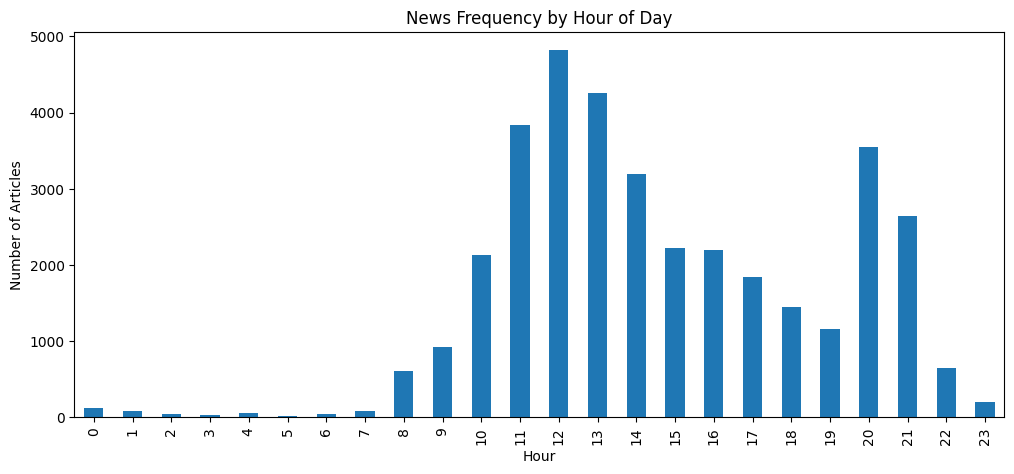

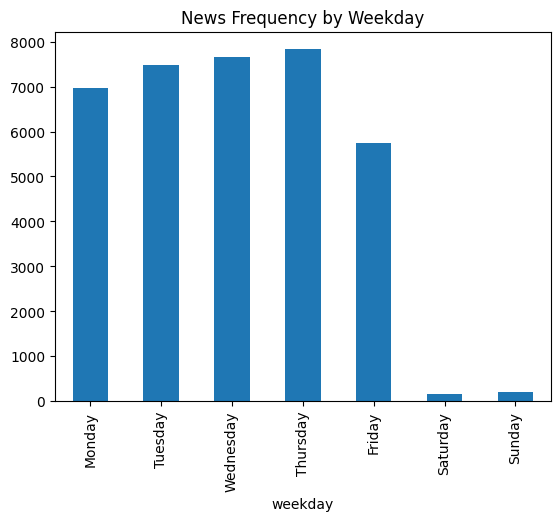

In [39]:
#3. Time-series Analysis of News Frequency by Hour of Day
df["hour"] = df["date"].dt.hour

df["hour"].value_counts().sort_index().plot(kind="bar", figsize=(12,5))
plt.title("News Frequency by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.show()

df["weekday"] = df["date"].dt.day_name()

df["weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind="bar")

plt.title("News Frequency by Weekday")
plt.show()


Top Publishers (Normalized):


publisher_normalized
paul quintaro    228373
lisa levin       186979
benzinga         182851
charles gross     96732
monica gerson     82380
eddie staley      57254
hal lindon        49047
etf professor     28489
juan lopez        28438
vick meyer        24826
Name: count, dtype: int64

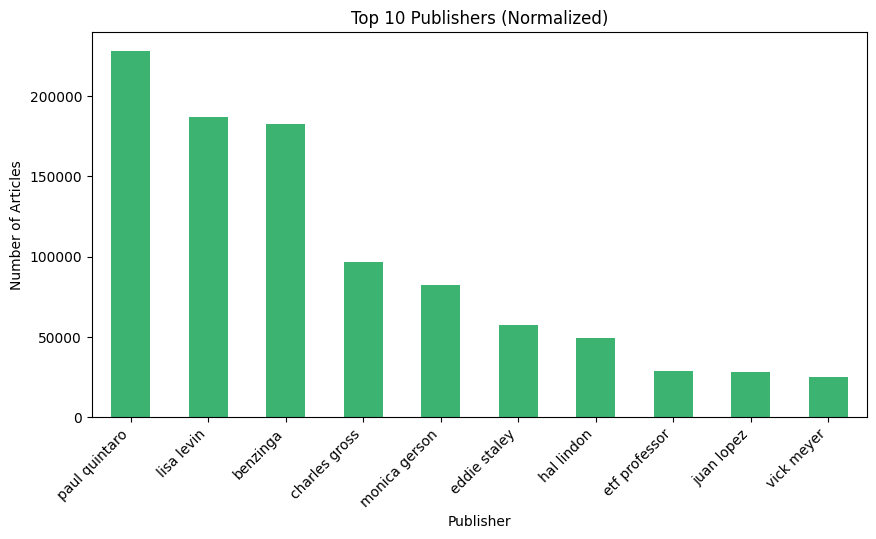

Top 10 Email Domains:


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

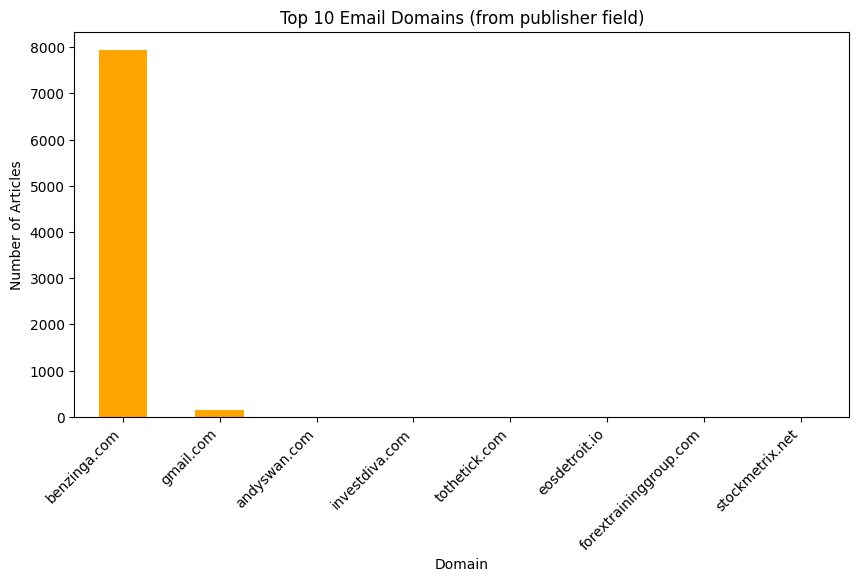

In [6]:
import re

# 2) Normalize publisher names
df['publisher_norm0'] = df['publisher'].fillna('unknown').astype(str).str.lower().str.strip()
is_email = df['publisher_norm0'].str.contains('@', na=False)
df['domain'] = None
df.loc[is_email, 'domain'] = df.loc[is_email, 'publisher_norm0'].str.extract(r'@(.+)$')[0]

def normalize_publisher_name(s):
    if not isinstance(s, str): return s
    s = s.lower()
    s = re.sub(r"(\bnewsdesk\b|\bnews\b|\bstaff\b|\bwebmaster\b)", ' ', s)
    s = re.sub(r'[_\-\|]', ' ', s)
    s = re.sub(r"[^a-z0-9\.\s]", ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s if '.' in s and ' ' not in s else s

df['publisher_normalized'] = None
df.loc[is_email, 'publisher_normalized'] = df.loc[is_email, 'domain']
df.loc[df['publisher_normalized'].isna(), 'publisher_normalized'] = df.loc[df['publisher_normalized'].isna(), 'publisher_norm0'].apply(normalize_publisher_name)
df['publisher_normalized'] = df['publisher_normalized'].str.strip()

# 3) Normalized counts
norm_counts = df['publisher_normalized'].value_counts()
print("Top Publishers (Normalized):")
display(norm_counts.head(10))
plt.figure(figsize=(10,5))
norm_counts.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Publishers (Normalized)')
plt.ylabel('Number of Articles')
plt.xlabel('Publisher')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4) Top email domains
domain_counts = df['domain'].dropna().value_counts().head(10)
if not domain_counts.empty:
    print('Top 10 Email Domains:')
    display(domain_counts)
    plt.figure(figsize=(10,5))
    domain_counts.plot(kind='bar', color='orange')
    plt.title('Top 10 Email Domains (from publisher field)')
    plt.ylabel('Number of Articles')
    plt.xlabel('Domain')
    plt.xticks(rotation=45, ha='right')
    plt.show()